In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits

In [2]:
store=pd.read_excel(r"E:\guvi BA\project BA\store.xlsx")

In [3]:
store.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [5]:
store.drop(["Row ID","Postal Code"],axis = 1, inplace= True)

In [6]:
store.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [7]:
store.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


In [8]:
s = store.corr().values

In [9]:
s

array([[ 1.        ,  0.20079477, -0.02819012,  0.47906435],
       [ 0.20079477,  1.        ,  0.00862297,  0.06625319],
       [-0.02819012,  0.00862297,  1.        , -0.21948746],
       [ 0.47906435,  0.06625319, -0.21948746,  1.        ]])

In [10]:
print("Number of Duplicated values: ", store.duplicated().sum())

Number of Duplicated values:  1


In [11]:
store.value_counts('Region')

Region
West       3203
East       2848
Central    2323
South      1620
dtype: int64

In [13]:
data_p = store[["Region", "Sales"]]
data_p.value_counts("Region")
data_p = data_p.groupby(data_p["Region"]).sum("Sales")
data_p = data_p.sort_values(by = "Sales", ascending = False)
data_p

,Sales
Region,
West,725457.8245
East,678781.2400
Central,501239.8908
South,391721.9050


<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

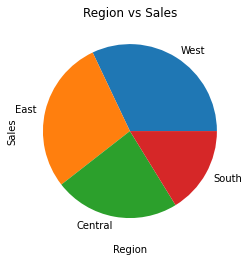

In [14]:
store['Region'].value_counts().plot(kind='pie')
plt.title('Region vs Sales')
plt.xlabel('Region')
plt.ylabel('Sales')
sns.despine

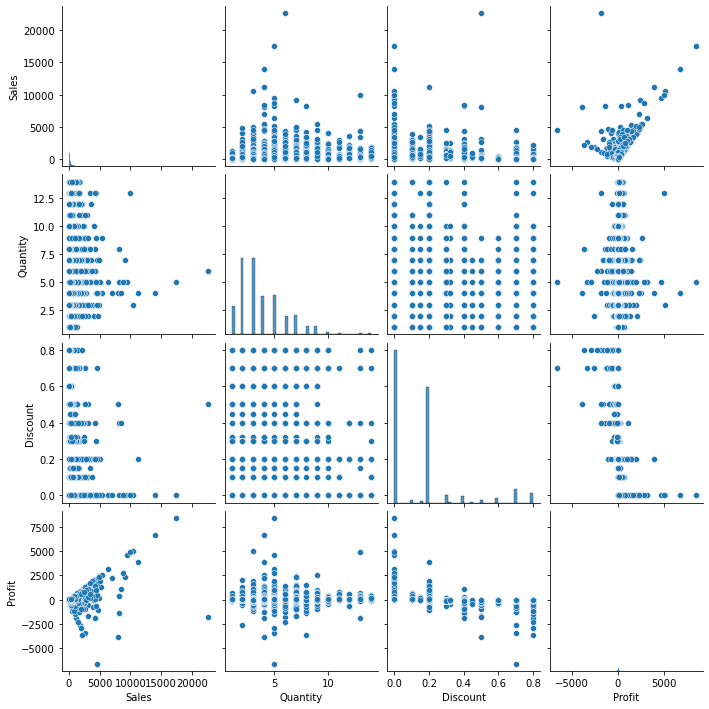

In [15]:
sns.pairplot(store) 
plt.show()

<AxesSubplot:>

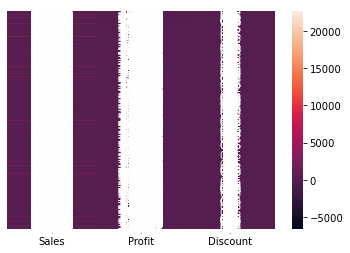

In [16]:
columns = store[['Sales', 'Profit', 'Discount']]

sns.heatmap(columns, annot=True, yticklabels = False)


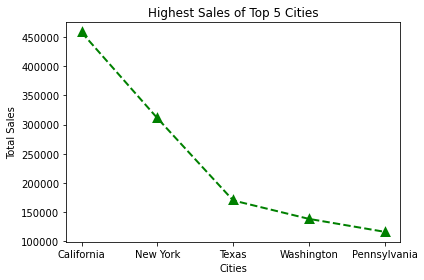

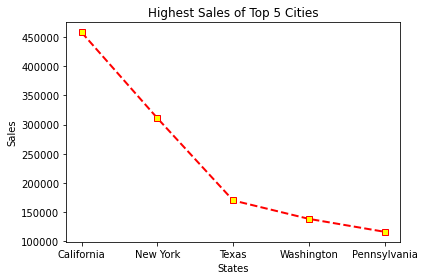

In [19]:
maximum_sales_segment = store[['State', 'Sales']]
maximum_sales_segment.sort_values(by = ['Sales'], ascending=False)
max_state = maximum_sales_segment.value_counts(subset=['State'], normalize= False)
max_sales_state = maximum_sales_segment.groupby(store["State"]).sum("Sales")
max_sales_state = max_sales_state.sort_values(by = 'Sales', ascending = False)
mss = max_sales_state.head(5)
# plot of total sales of each state in alphabetical order

values = mss["Sales"]
plt.plot(values, scalex= True, color='red', linestyle='dashed',linewidth=2, marker = 's', markerfacecolor = 'yellow')
plt.xlabel('States')
plt.ylabel('Sales')
plt.title('Highest Sales of Top 5 Cities')
plt.tight_layout()

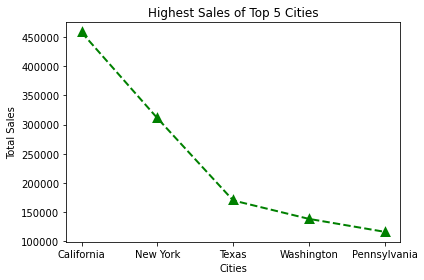

In [23]:
values = mss["Sales"]
plt.plot(values, scalex= True, color='green', linestyle='dashed',linewidth=2, marker = '^', markeredgewidth = 3)
plt.xlabel('Cities')
plt.ylabel('Total Sales')
plt.title('Highest Sales of Top 5 Cities')
plt.tight_layout()

In [24]:
import statsmodels.formula.api as smf

In [25]:
model=smf.ols(formula="Sales ~ Profit+Quantity",data=store)

In [26]:
fit=model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     1739.
Date:                Thu, 17 Nov 2022   Prob (F-statistic):               0.00
Time:                        15:54:38   Log-Likelihood:                -76999.
No. Observations:                9994   AIC:                         1.540e+05
Df Residuals:                    9991   BIC:                         1.540e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.9572     10.606      1.316      0.188      -6.833      34.747
Profit         1.2446      0.023     54.173      0.000       1.200       1.290
Quantity      47.5605      2.419     19.663      0.000      42.819      52.302
==============================================================================
Omnibus:                    20123.520   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        121157426.942
Skew:                          16.207   Prob(JB):                         0.00
Kurtosis:                     541.425   Cond. No.                         475.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
X = store['Sales']
y = store['Quantity']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [32]:
import statsmodels.api as sm

In [33]:
X_train_intercept = sm.add_constant(X_train)

In [34]:
linearreg = sm.OLS(y_train, X_train_intercept).fit()

In [35]:
linearreg.params

const    3.620167
Sales    0.000688
dtype: float64

In [40]:

import statsmodels.api as sm
import statsmodels.formula.api as smf
auto_filepath = "store.xlsx"
store = pd.read_excel(r"E:\guvi BA\project BA\store.xlsx", na_values = ["?"]).dropna()
mod = smf.ols(formula = "Sales ~ Discount+Profit", data = store)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     1541.
Date:                Thu, 17 Nov 2022   Prob (F-statistic):               0.00
Time:                        15:55:26   Log-Likelihood:                -77148.
No. Observations:                9994   AIC:                         1.543e+05
Df Residuals:                    9991   BIC:                         1.543e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    153.8540      7.023     21.908      0.0